## Spaceship titanic

### Analiza Zadania
Zadaniem jest przewidziec czy pasażerowie zostali przetransportowani 
Mam do czynienia z uczeniem nadzorowanym w którym wykorzystujemy dane wejsciowe z etykietami aby nauczyc model przewiwywac wynik dla nowych danych
Zadanie to jest przykładem klasyfikacji binarnej która przewiduje jedna z dwóch klas 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Analiza danych

In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/marti0001/M_Olszewski-projects-portfolio/refs/heads/master/Spaceship_Titanic/input/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/marti0001/M_Olszewski-projects-portfolio/refs/heads/master/Spaceship_Titanic/input/test.csv")
sample_submission = pd.read_csv("https://raw.githubusercontent.com/marti0001/M_Olszewski-projects-portfolio/refs/heads/master/Spaceship_Titanic/input/sample_submission.csv")

In [3]:
train.sample(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8630,9205_03,Europa,True,B/300/P,TRAPPIST-1e,52.0,NaN,0.0,0.0,0.0,0.0,0.0,Propent Brakeng,True


In [4]:
train.shape

(8693, 14)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

### Wnioski z analizy
Dane zawierają 14 kolumn i 8693 wierszy
Dane sa zróznicowane z pod kątem typów:
- 7 kolumn zawiera ty tanych 'object' który moze zawierac dowolna wartosc, pop przejrzeniu przykłądowych danych sa to napisy
- 6 cech to watosci zmienno przecinkowe
- 1 cecha to wartosc boolowska (true/false)

Duzo wartosc jest pustych 

Wartoscii kategoryczne znajduja sie w kolumnach:
- HomePlanet (Earth,Europa,Mars)
- CryoSleep znajduje sie True/False
- Destination (TRAPPIST-1e, 55 Cancri e, PSO J318.5-22)
- VIP  znajduje sie True/Flase)

Cecha PassengerId to unikalny identyfikator każdego pasażera. Każdy identyfikator ma formę gggg_pp, gdzie gggg oznacza grupę, z którą podróżuje pasażer, a pp to jego numer w grupie. Osoby w grupie są często członkami rodziny, ale nie zawsze.

### Wizualizacja danych

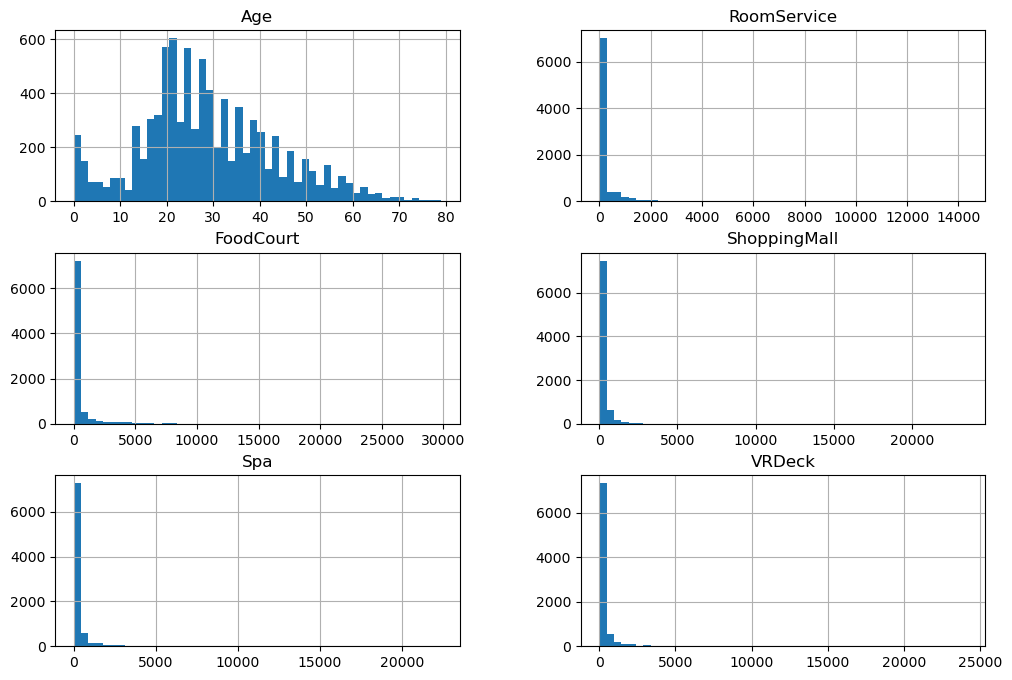

In [8]:
train.hist(bins = 50, figsize = (12,8))
plt.show()

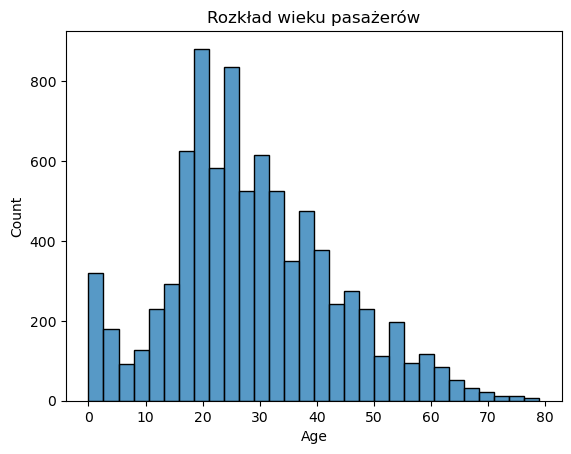

In [9]:
sns.histplot(train['Age'].dropna(), bins=30)
plt.title('Rozkład wieku pasażerów')
plt.show()

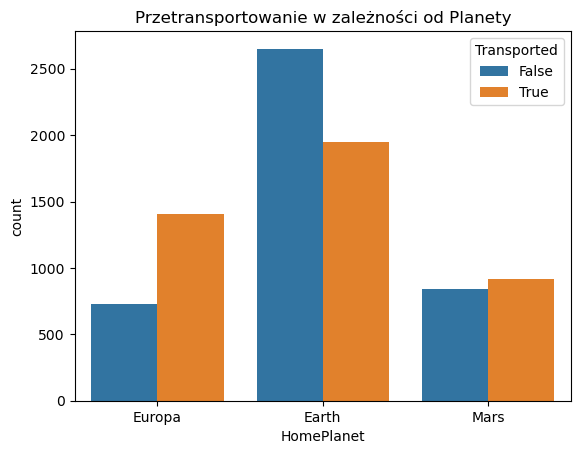

In [10]:
sns.countplot(x='HomePlanet', hue='Transported', data=train)
plt.title('Przetransportowanie w zależności od Planety')
plt.show()

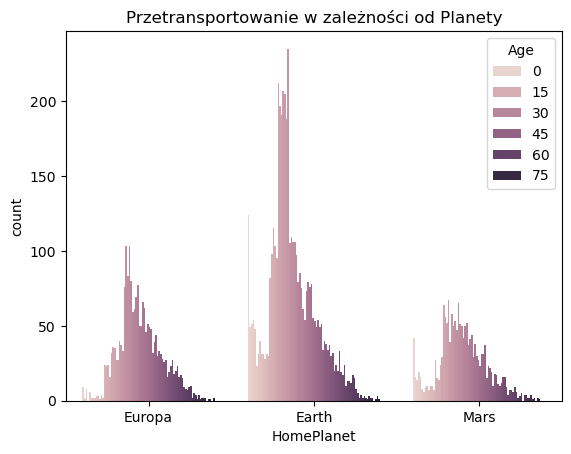

In [11]:
sns.countplot(x='HomePlanet', hue='Age', data=train)
plt.title('Przetransportowanie w zależności od Planety')
plt.show()

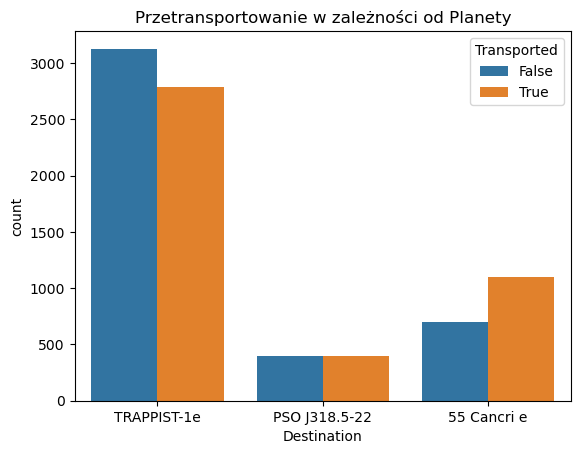

In [12]:
sns.countplot(x='Destination', hue='Transported', data=train)
plt.title('Przetransportowanie w zależności od Planety')
plt.show()

### Wnioski z Wizualizacji

### Zamiana danych kategorycznych na numeryczne i wypełnienie danych

Dane które bedzmiemy kowertowac musza byc zmienione dla dataset train i test

Moim plane jest:
- Ceche PassengerId nie trzeba uzupełniac ale rozdzile ja bo sa w niej zawarte grupy
- Ceche CryoSleep - wypełnic puste waartosci danymi z udogodnien na statki poniewa jezeli ktos spi to nie moze wydawac pieniedzy na statku
- Ceche Cabin - rozbije na poszczegolne sektory poniewaz zawartosc to prawdopodobnie pokład/numer kabiny/strona statku(prawa/lewa burta) i wypełnie modą
- Ceche Destination - wypełnie je używajac grup,moim założeniem jest ze pasażerowie z tej samej grupy maja ten sam cel podrózy, a jezeli nie napewno znajduja sie na tym samym pokładzie 
- Ceche Age - wypełnie moda
- Ceche VIP - wypełnie wartośćia False
- Ceche RoomService - wypełnie 0
- Ceche FoodCourt - wypełnie 0
- Ceche ShoppingMall - wypełnie 0
- Ceche Spa - wypełnie 0
- Ceche VRDeck - wypełnie 0
- Ceche Name - usune poniewaz nie beda przydatne  
- Ceche Transported - jest to target

In [13]:
train.isnull().sum()


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [14]:
train['GroupID']= train['PassengerId'].map(lambda x: x.split('_')[0]).astype(int)
test['GroupID']= test['PassengerId'].map(lambda x: x.split('_')[0]).astype(int)


In [15]:
train['GroupSize'] = train.groupby('GroupID')['PassengerId'].transform('count')
test['GroupSize'] = test.groupby('GroupID')['PassengerId'].transform('count')


In [16]:
def sleep(row):
    if row['RoomService'] > 0 : return False
    if row['FoodCourt'] > 0 : return False
    if row['ShoppingMall'] > 0 : return False
    if row['Spa'] > 0 : return False
    if row['VRDeck'] > 0 : return False
    return True

train.loc[train['CryoSleep'].isnull(),'CryoSleep'] = train.apply(sleep, axis = 1)
test.loc[test['CryoSleep'].isnull(),'CryoSleep'] = test.apply(sleep, axis = 1)


In [17]:
train['cabin_first_label'] = train["Cabin"].map(lambda x: x.split("/")[0] if isinstance(x, str) and len(x.split("/")) > 0 else None)
train['cabin_secound_label'] = train["Cabin"].map(lambda x: x.split("/")[1] if isinstance(x, str) and len(x.split("/")) > 1 else None)
train['cabin_third_label'] = train["Cabin"].map(lambda x: x.split("/")[2] if isinstance(x, str) and len(x.split("/")) > 1 else None)


In [25]:
# Grupujemy wartosci z Destination według GroupID, 
most_common_destination = train.groupby("GroupID")["Destination"].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Wypełnienie brakujących wartości 'Destination' na podstawie 'GroupID'
train['FilledDestination'] = train.apply(
    lambda row: most_common_destination[row['GroupID']] if pd.isna(row['Destination']) else row['Destination'],
    axis=1
)

# Krok 2: Wypełnienie na podstawie najczęstszej destynacji dla 'cabin_first_label', jeśli nadal są braki
most_common_by_deck = train.groupby('cabin_first_label')['FilledDestination'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Uzupełnianie pozostałych braków na podstawie 'cabin_first_label'
train['FilledDestination'] = train.apply(
    lambda row: most_common_by_deck[row['cabin_first_label']] 
    if pd.isna(row['FilledDestination']) and row['cabin_first_label'] in most_common_by_deck 
    else row['FilledDestination'],
    axis=1
)

# Wyświetlenie liczby pozostałych brakujących wartości
print("Pozostałe brakujące wartości w 'FilledDestination':", train['FilledDestination'].isna().sum())


Pozostałe brakujące wartości w 'FilledDestination': 2


In [33]:
train.groupby("GroupID")["Destination"].sum()

GroupID
1                             TRAPPIST-1e
2                             TRAPPIST-1e
3                  TRAPPIST-1eTRAPPIST-1e
4                             TRAPPIST-1e
5                           PSO J318.5-22
                      ...                
9275    TRAPPIST-1eTRAPPIST-1eTRAPPIST-1e
9276                          55 Cancri e
9278                        PSO J318.5-22
9279                          TRAPPIST-1e
9280               55 Cancri eTRAPPIST-1e
Name: Destination, Length: 6217, dtype: object

In [26]:
train[train['FilledDestination'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,GroupSize,cabin_first_label,cabin_secound_label,cabin_third_label,FilledDestination
5710,6048_01,Mars,True,NaN,NaN,25.0,False,0.0,0.0,0.0,0.0,0.0,Mele Clake,False,6048,1,None,None,None,None
6112,6451_01,Mars,False,NaN,NaN,37.0,False,610.0,NaN,410.0,148.0,14.0,Carkes Panad,False,6451,1,None,None,None,None


In [36]:
train[['cabin_first_label', 'cabin_secound_label', 'cabin_third_label', 'Cabin']].sample(5)


,cabin_first_label,cabin_secound_label,cabin_third_label,Cabin
5218,E,349,P,E/349/P
3233,G,571,P,G/571/P
6424,G,1102,S,G/1102/S
54,A,1,S,A/1/S
7280,G,1261,S,G/1261/S


In [37]:
train['cabin_secound_label'] = train['cabin_secound_label'].astype('int') 

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

In [ ]:
cabin_first_label_dict = {
    'A':1,'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8
}
train['cabin_first_label'] = train['cabin_first_label'].map(cabin_first_label_dict)

In [ ]:
cabin_first_label_dict = {'S':1,'P':2}
train['cabin_third_label'] = train['cabin_third_label'].map(cabin_first_label_dict)

In [15]:
# Grupowanie pasażerów na podstawie kolumny 'Group' (np. numer rezerwacji)
# Jeśli taka kolumna nie istnieje, stwórz ją na podstawie innych cech (np. nazwiska lub kabiny)
train['Group'] = train['PassengerId'].str.split('_').str[0]  # Zakładając, że PassengerId zawiera informację o grupie

# Tworzenie tabeli przestawnej pokazującej liczbę pasażerów na różnych 'Destination' w każdej grupie
destination_group_table = train.pivot_table(index='Group', columns='Destination', aggfunc='size', fill_value=0)

# Wyświetlenie tabeli
print(destination_group_table)

Destination  55 Cancri e  PSO J318.5-22  TRAPPIST-1e
Group                                               
0001                   0              0            1
0002                   0              0            1
0003                   0              0            2
0004                   0              0            1
0005                   0              1            0
...                  ...            ...          ...
9275                   0              0            3
9276                   1              0            0
9278                   0              1            0
9279                   0              0            1
9280                   1              0            1

[6114 rows x 3 columns]


- HomePlanet      201
9
Destination     1- 82
Age             179
VIP        policze srednia wydanych pieniedzy na statku da osób nie bedacych vipem, jezli jest powyzej to bedzie to vip -  203
Room Servicwypłn -   181
Fo odCourtwypełn -    183
 Shoppingwypełnl-     208
Spa    wypełnn -      1 83
VRDeckwypełn       188
Name usun rted       0

In [ ]:
# Wypełnianie brakujących wartości dla zmiennych kategorycznych
train['HomePlanet'] = train['HomePlanet'].fillna(train['HomePlanet'].mode()[0])
train['Cabin'] = train['Cabin'].fillna('-1')
train['cabin_first_label'] = train['cabin_first_label'].fillna(train['cabin_first_label'].mode()[0])
train['cabin_secound_label'] = train['cabin_secound_label'].fillna(train['cabin_secound_label'].mode()[0])
train['cabin_third_label']  = train['cabin_third_label'] .fillna(train['cabin_third_label'].mode()[0])


train['Destination'] = train['Destination'].fillna(train['Destination'].mode()[0])

test['HomePlanet'] = test['HomePlanet'].fillna(test['HomePlanet'].mode()[0])
test['Cabin'] = test['Cabin'].fillna('Unknown')
test['VIP'] = test['VIP'].fillna(False)

test['Destination'] = test['Destination'].fillna(test['Destination'].mode()[0])

# Wypełnianie brakujących wartości dla zmiennej 'Age'
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 

categorial_col = ['HomePlanet', 'Destination','CryoSleep','VIP' ]

train['Transported'] = le.fit_transform(train['Transported'])

for col in categorial_col:
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])
    



### Model bazowy

In [25]:
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import cross_val_score

X  = train.drop(['Cabin','Name','Transported','cabin_secound_label'], axis = 1)
y = train['Transported']

cross_val_score(DummyClassifier(strategy='stratified', random_state=42),X,y, cv = 5).mean()

0.49453589916827195

In [26]:
cross_val_score(DecisionTreeClassifier(max_depth=3, random_state=42), X, y, scoring='accuracy', cv=5).mean()

0.6909153111684757

In [27]:
cross_val_score(RandomForestClassifier(max_depth=3, n_estimators=100, random_state=42), X, y, scoring='accuracy', cv=5).mean()

0.7405992359668632

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle= True, random_state = 42)

accuracies = []
                      
for train_index, val_index in skf.split(X,y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val,y_pred)
    accuracies.append(accuracy)
    
print(f'Średnia dokładność: {sum(accuracies)/len(accuracies):.4f}')


Średnia dokładność: 0.7949


In [31]:
train['is_alone'] = train['GroupID'].map(lambda x: 1 if x == 1 else 0)
test['is_alone'] = test['GroupID'].map(lambda x: 1 if x == 1 else 0)


In [32]:
X = train.drop(columns=['Transported', 'PassengerId', 'Name', 'Cabin', 'GroupID','cabin_secound_label'])  # Usuwamy zbędne kolumny
y = train['Transported']  # Etykieta do przewidywania

skf = StratifiedKFold(n_splits=5, shuffle= True, random_state = 42)

# Przechowujemy wyniki dokładności z każdej iteracji
accuracies = []

# Modelowanie za pomocą StratifiedKFold
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Tworzymy model (Random Forest w tym przypadku)
    model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
    
    # Trenowanie modelu
    model.fit(X_train, y_train)
    
    # Przewidywania na zbiorze walidacyjnym
    y_pred = model.predict(X_val)
    
    # Obliczanie dokładności
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)

# Średnia dokładność z 5-fold stratified cross-validation
print(f'Średnia dokładność: {sum(accuracies)/len(accuracies):.4f}')

Średnia dokładność: 0.7936


In [36]:
import xgboost as xgb


accuracies = []

# Modelowanie za pomocą StratifiedKFold
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Tworzymy model (Random Forest w tym przypadku)
    xgb_model = xgb.XGBClassifier(
    random_state=42,
    n_estimators=500,
    learning_rate=0.01
)

    
    # Trenowanie modelu
    xgb_model.fit(X_train, y_train)
    
    # Przewidywania na zbiorze walidacyjnym
    y_pred = xgb_model.predict(X_val)
    
    # Obliczanie dokładności
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)

# Średnia dokładność z 5-fold stratified cross-validation
print(f'Średnia dokładność: {sum(accuracies)/len(accuracies):.4f}')

Średnia dokładność: 0.8026


In [37]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    xgb_model = xgb.XGBClassifier(random_state=42)

    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_grid,
        n_iter=50,
        scoring='accuracy',
        random_state=42,
        n_jobs=-1
    )

    random_search.fit(X_train, y_train)

print("Najlepsze parametry:", random_search.best_params_)
print("Najlepsza dokładność:", random_search.best_score_)


Najlepsze parametry: {'subsample': 0.6, 'reg_lambda': 2, 'reg_alpha': 0.01, 'n_estimators': 1000, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.6}
Najlepsza dokładność: 0.8023005032350827
